<a href="https://colab.research.google.com/github/AVBrovkin/rep_test1/blob/branch1/br1/Copy_EM_example_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math as math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
import os
import datetime

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 100)
# %config InlineBackend.figure_format='png'
%config InlineBackend.figure_format='retina'

import warnings
warnings.simplefilter('ignore')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture as GMM

In [ ]:
N1 =6000
N2 = 4000
N = N1 + N2

X =np.zeros((N,1))

In [ ]:
X[:N1,0] = np.random.normal(loc=4, scale=1, size=N1)
X[N1:N,0] = np.random.normal(loc=6, scale=2, size=N2)

y = np.zeros((N))
y[:N1] = np.array((1))
y[N1:N] = np.array((2))

In [ ]:
df = pd.DataFrame({'value':X[:,0],'y':y})
print(df.shape)
df[:3]

(10000, 2)


,value,y
0,2.273039,1.0
1,3.721219,1.0
2,2.970511,1.0


In [ ]:
df['y'].value_counts(dropna=False)

1.0    6000
2.0    4000
Name: y, dtype: int64

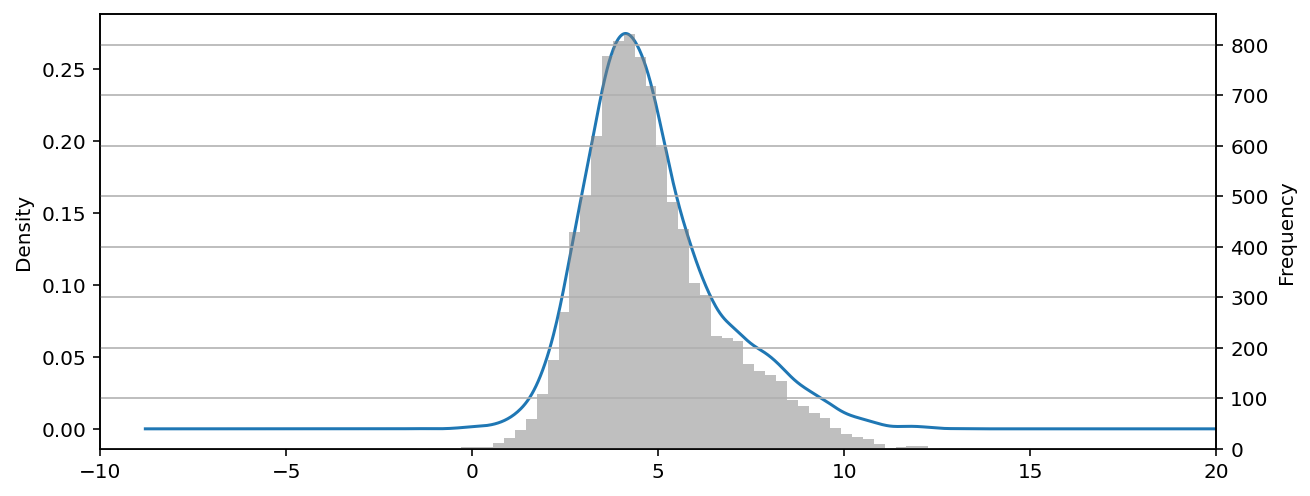

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,4))

df['value'].plot(kind='kde',label='',ax=ax)

ax2 = ax.twinx()
df['value'].plot(kind='hist',bins=50,ax=ax2,color='gray',alpha=0.5)

plt.xlim(-10,20)
# plt.ylim(0,1000)
plt.grid()
plt.show()

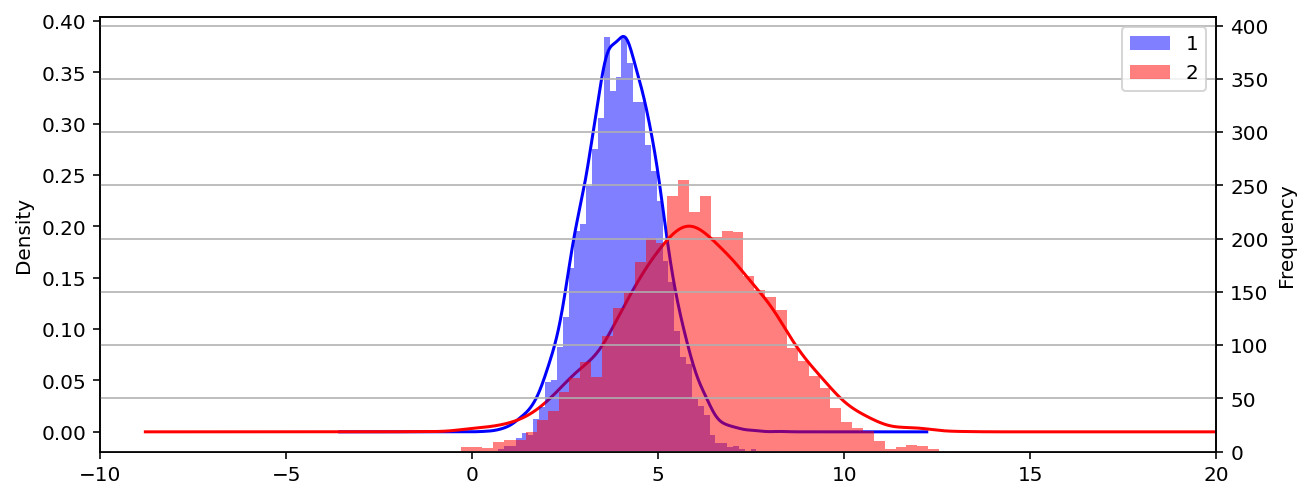

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,4))

df[df['y']==1]['value'].plot(kind='kde',ax=ax, color='blue')
df[df['y']==2]['value'].plot(kind='kde',ax=ax, color='red')

ax2 = ax.twinx()
df[df['y']==1]['value'].plot(kind='hist',bins=50,ax=ax2,color='blue',alpha=0.5,label='1')
df[df['y']==2]['value'].plot(kind='hist',bins=50,ax=ax2,color='red',alpha=0.5,label='2')

plt.legend()
plt.xlim(-10,20)
# plt.ylim(0,1000)
plt.grid()
plt.show()

In [ ]:
bins_ = np.histogram(df['value'],bins=30)
bins_

(array([   1,    0,    5,    8,   19,   50,  119,  301,  620,  899, 1248,
        1376, 1252, 1023,  739,  525,  405,  357,  265,  247,  185,  134,
          99,   52,   38,   13,    6,    9,    4,    1]),
 array([-1.48113514, -0.99396608, -0.50679701, -0.01962794,  0.46754112,
         0.95471019,  1.44187925,  1.92904832,  2.41621739,  2.90338645,
         3.39055552,  3.87772458,  4.36489365,  4.85206271,  5.33923178,
         5.82640085,  6.31356991,  6.80073898,  7.28790804,  7.77507711,
         8.26224618,  8.74941524,  9.23658431,  9.72375337, 10.21092244,
        10.6980915 , 11.18526057, 11.67242964, 12.1595987 , 12.64676777,
        13.13393683]))

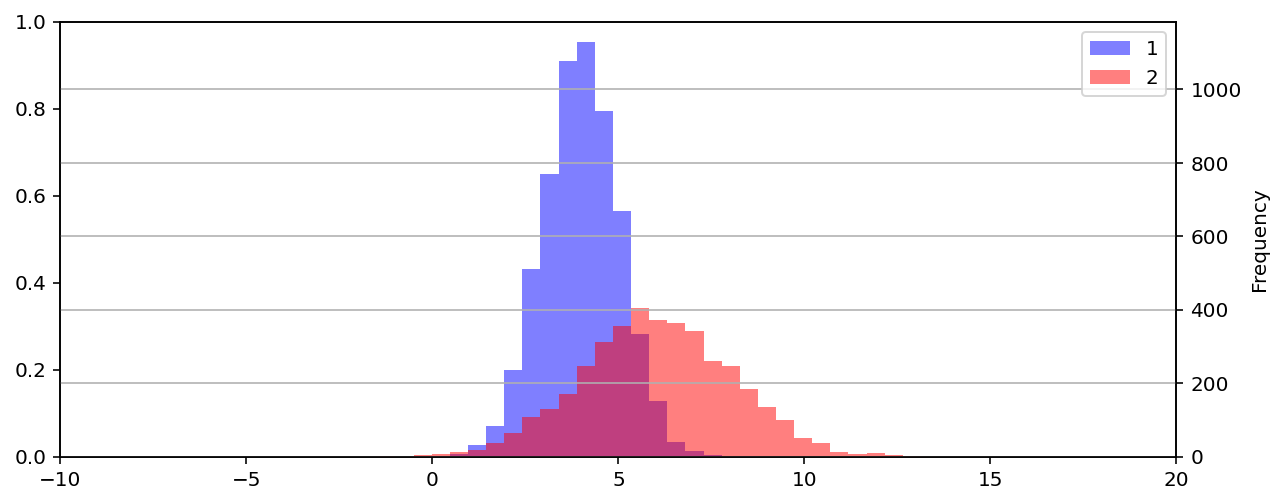

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,4))

# df[df['y']==1]['value'].plot(kind='kde',ax=ax, color='blue')
# df[df['y']==2]['value'].plot(kind='kde',ax=ax, color='red')

ax2 = ax.twinx()
# df['value'].plot(kind='hist',bins=bins_[1],ax=ax2,color='gray',alpha=0.5)
df[df['y']==1]['value'].plot(kind='hist',bins=bins_[1],ax=ax2,color='blue',alpha=0.5,label='1')
df[df['y']==2]['value'].plot(kind='hist',bins=bins_[1],ax=ax2,color='red',alpha=0.5,label='2')

plt.legend()
plt.xlim(-10,20)
# plt.ylim(0,1000)
plt.grid()
plt.show()

In [ ]:
df[:3]

,value,y
0,2.273039,1.0
1,3.721219,1.0
2,2.970511,1.0


In [ ]:
model = GMM(n_components=2, covariance_type='diag')
model.fit(df[['value']])


GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
model.weights_

array([0.2619015, 0.7380985])

In [ ]:
model.means_

array([[6.90763475],
       [4.05963159]])

In [ ]:
model.covariances_

array([[2.8065068 ],
       [1.23301978]])

In [ ]:
df['y_pred'] = model.predict(df[['value']])
df['y_pred'] = df['y_pred'].map({0:2,1:1})
df[:3]

,value,y,y_pred
0,2.273039,1.0,1
1,3.721219,1.0,1
2,2.970511,1.0,1


In [ ]:
pd.crosstab(df['y'],df['y_pred'])

y_pred,1,2
y,,
1.0,5867,133
2.0,2035,1965


In [ ]:
print(round(accuracy_score(df['y'], df['y_pred']),3))

0.783


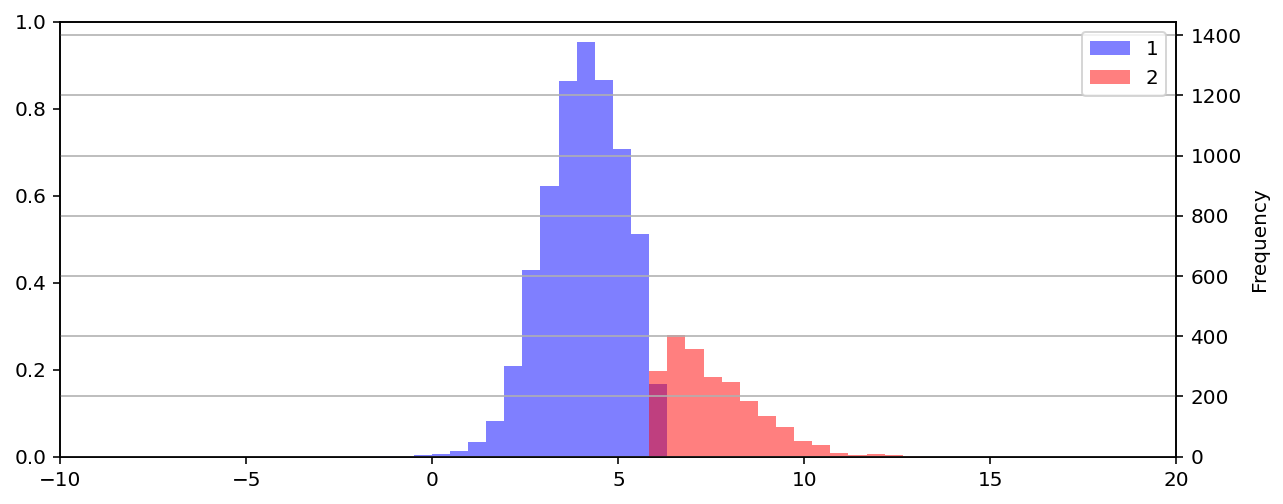

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,4))

# df[df['y']==1]['value'].plot(kind='kde',ax=ax, color='blue')
# df[df['y']==2]['value'].plot(kind='kde',ax=ax, color='red')

ax2 = ax.twinx()
# df['value'].plot(kind='hist',bins=bins_[1],ax=ax2,color='gray',alpha=0.5)
df[df['y_pred']==1]['value'].plot(kind='hist',bins=bins_[1],ax=ax2,color='blue',alpha=0.5,label='1')
df[df['y_pred']==2]['value'].plot(kind='hist',bins=bins_[1],ax=ax2,color='red',alpha=0.5,label='2')

plt.legend()
plt.xlim(-10,20)
# plt.ylim(0,1000)
plt.grid()
plt.show()